# Results analysis

## Load data
expected file structure:
```
results/
    adagrad/
        BC2GM.pickle
        BC4CHEMD.pickle
        BC5CDR-chem.pickle
        BC5CDR-disease.pickle
        JNLPBA.pickle
        NCBI.pickle
    adam/
        BC2GM.pickle
        BC4CHEMD.pickle
        BC5CDR-chem.pickle
        BC5CDR-disease.pickle
        JNLPBA.pickle
        NCBI.pickle
    rmsprop/
        BC2GM.pickle
        BC4CHEMD.pickle
        BC5CDR-chem.pickle
        BC5CDR-disease.pickle
        JNLPBA.pickle
        NCBI.pickle
```


In [26]:
from pathlib import Path

results_directory = Path('results/')
optimizers = ['adagrad', 'adam', 'rmsprop']
datasets = ['BC2GM', 'BC4CHEMD', 'BC5CDR-chem', 'BC5CDR-disease', 'JNLPBA', 'NCBI']

In [27]:
import pickle
from collections import defaultdict

data = defaultdict(dict)

for optimizer in optimizers:
    for dataset in datasets:
        path = results_directory / optimizer / f'{dataset}.pickle'
        with open(path, 'rb') as file:
            model_dict = pickle.load(file)
            data[dataset][optimizer] = model_dict[dataset]

## Loss plot

In [28]:
import matplotlib.pyplot as plt

def make_loss_plot(metrics_dict, title, ax=None):
    trainLossList = metrics_dict['trainLossList']
    testLossList = metrics_dict['testLossList']

    epochs = list(range(1, len(trainLossList) + 1))
    
    if ax is None:
        plt.figure(figsize=(10, 6))
        plt.plot(epochs, trainLossList, 'b-o', label='Training Loss')
        plt.plot(epochs, testLossList, 'r-o', label='Testing Loss')
        plt.title(title)
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
        plt.grid(True)
    else:
        ax.plot(epochs, trainLossList, 'b-o', label='Training Loss')
        ax.plot(epochs, testLossList, 'r-o', label='Testing Loss')
        ax.set_title(title)
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Loss')
        ax.legend()
        ax.grid(True)

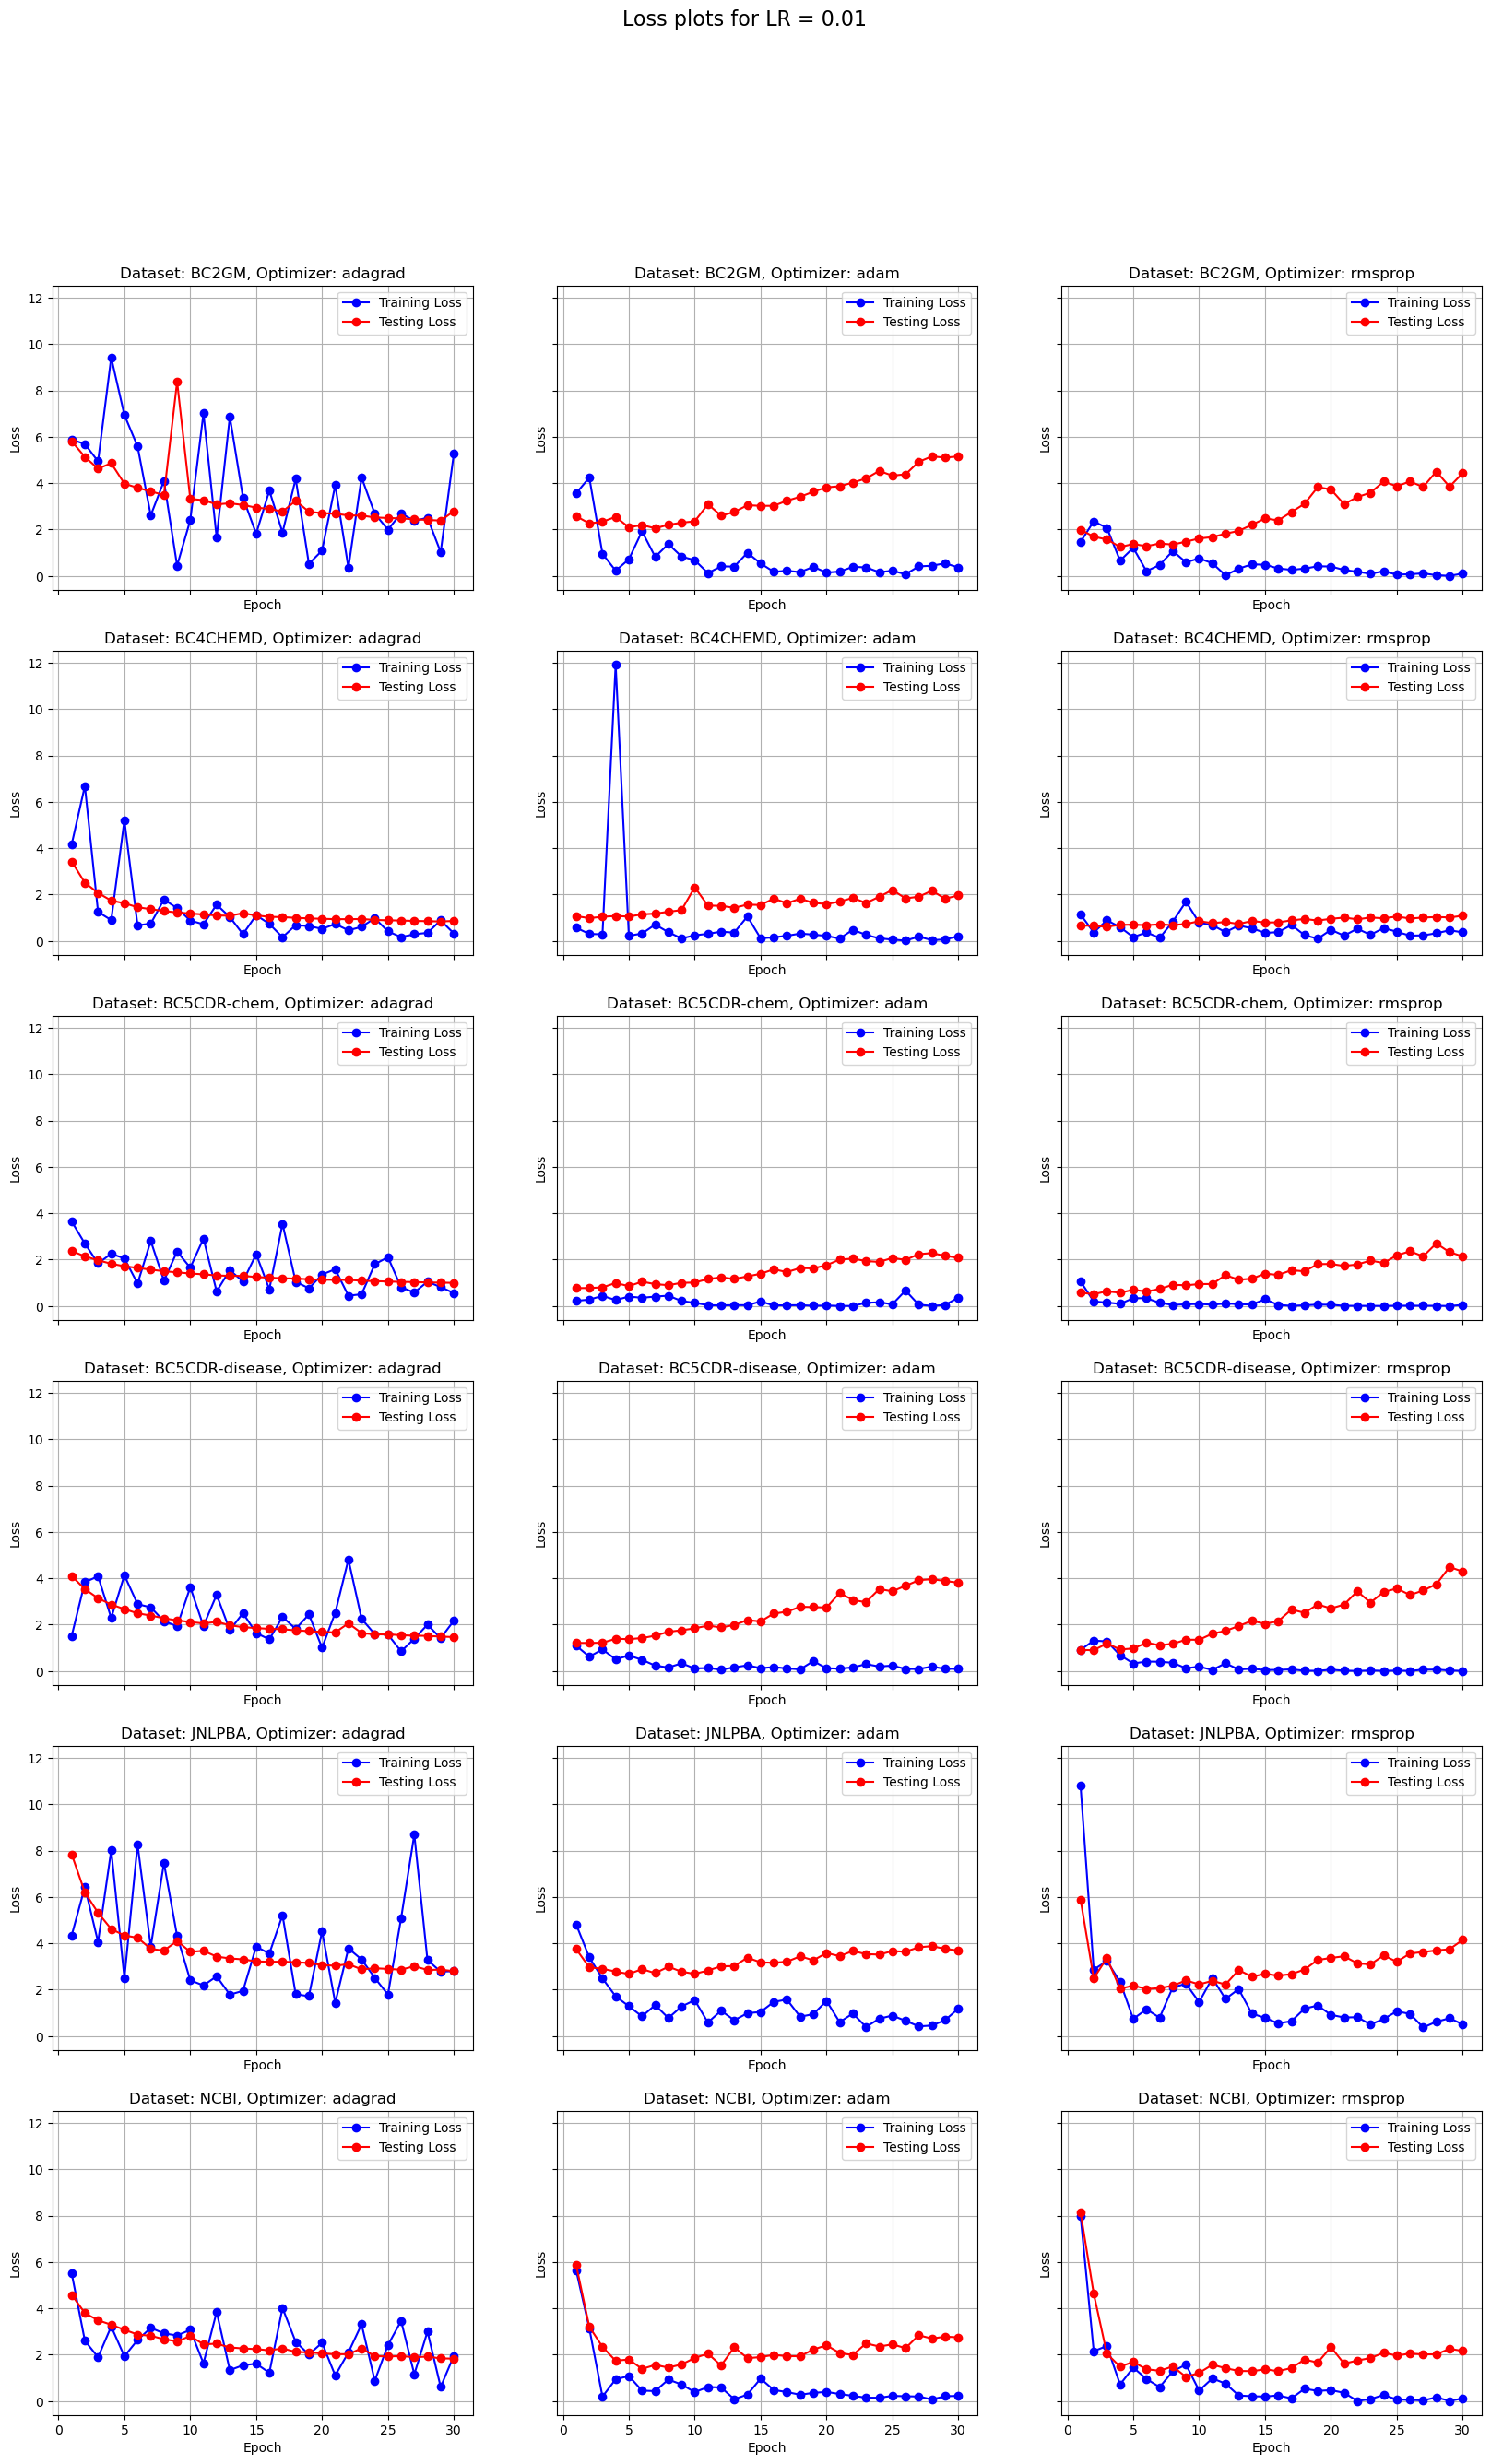

In [34]:
fig, ax = plt.subplots(figsize=(20, 5 * len(datasets)), nrows=len(datasets), ncols=len(optimizers), sharey=True, sharex=True)
plt.suptitle('Loss plots for LR = 0.01', fontsize=16)

for j, dataset in enumerate(datasets):
    for i, optimizer in enumerate(optimizers):
        make_loss_plot(data[dataset][optimizer], f'Dataset: {dataset}, Optimizer: {optimizer}', ax[j, i])
        
# Save all plots to pdf
plt.savefig('loss_plots.pdf')